In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("data/salary_synteticdata.csv")

In [4]:
data.head()

,Age,Salary
0,52,94500
1,45,82250
2,33,61250
3,47,85750
4,37,68250


In [5]:
data.shape

(1000, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3d2dcb6820>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3d2dcb6ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3d2dcb64c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d2dc4e5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d2dc4e8e0>],
 'means': []}

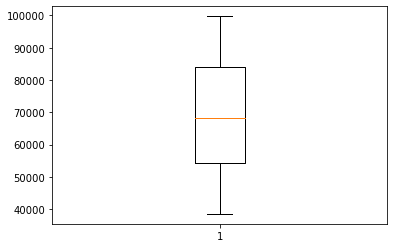

In [6]:
plt.boxplot(data['Salary']) #there are no outliers since the data is synthetic

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3d2dbc8520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3d2dbc8be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3d2dbc81c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d2dbd32e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d2dbd35e0>],
 'means': []}

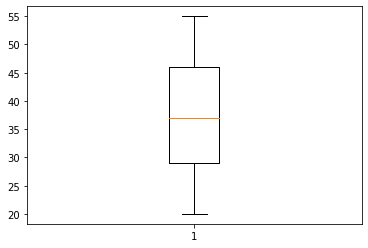

In [7]:
plt.boxplot(data['Age']) ##there are no outliers since the data is synthetic

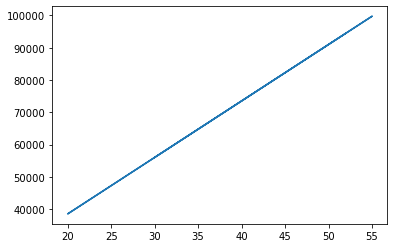

In [8]:
plt.plot(data['Age'],data['Salary']) #data has a good liner relationship

In [9]:
data.corr() #data has a correlation of 1

,Age,Salary
Age,1.0,1.0
Salary,1.0,1.0


In [10]:
#split the data into X and y
X=data['Age']
y=data['Salary']

In [11]:
X=X.values.reshape(-1, 1) #X should be an array or dataframe

In [12]:
X.shape

(1000, 1)

In [13]:
y.head()

0    94500
1    82250
2    61250
3    85750
4    68250
Name: Salary, dtype: int64

# split the data into train and test sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) #0.75 data will be for training.

In [15]:
X_train.shape

(750, 1)

In [16]:
X_test.shape

(250, 1)

## Use Linear Regression for modelling

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #creating object of LinearRegression
reg.fit(X_train,y_train) #training and fitting LR object using training data

#fit command is used for training a model using train data.

LinearRegression()

In [18]:
#coeeficients of liner regression - m
reg.coef_

array([1750.])

In [19]:
#intercept of liner regression - c
reg.intercept_


3500.000000000029

In [20]:
ypred=reg.predict(X_test)  #predicting the salary for testing data

In [21]:
ypred

array([99750., 63000., 40250., 66500., 54250., 75250., 94500., 52500.,
       78750., 73500., 84000., 45500., 78750., 68250., 66500., 94500.,
       40250., 71750., 70000., 80500., 73500., 91000., 54250., 47250.,
       78750., 57750., 94500., 45500., 68250., 42000., 61250., 50750.,
       63000., 56000., 61250., 52500., 66500., 80500., 98000., 40250.,
       70000., 64750., 75250., 70000., 63000., 77000., 87500., 89250.,
       77000., 50750., 70000., 98000., 98000., 89250., 57750., 38500.,
       40250., 87500., 52500., 40250., 61250., 49000., 91000., 77000.,
       64750., 77000., 96250., 59500., 78750., 91000., 45500., 59500.,
       96250., 61250., 68250., 45500., 38500., 84000., 78750., 82250.,
       59500., 54250., 99750., 78750., 57750., 63000., 89250., 56000.,
       54250., 82250., 52500., 57750., 70000., 61250., 80500., 71750.,
       47250., 45500., 85750., 70000., 56000., 75250., 84000., 50750.,
       96250., 94500., 40250., 64750., 99750., 84000., 71750., 82250.,
      

In [22]:
from sklearn.metrics import mean_squared_error #calculating MSE
MSE=mean_squared_error(ypred,y_test)
print("MSE:",MSE)

MSE: 6.903318520122548e-23


In [23]:
sum((y_test-ypred)**2)/len(ypred) #this is how we can calculate MSE.

6.903318520122548e-23

In [24]:
Results= pd.DataFrame(columns=['Actual','Predicted','Age'])
Results['Actual']=y_test
Results['Predicted']=ypred
Results['Age']=X_test
Results=Results.reset_index()
Results['Id']=Results.index
Results.head()

,index,Actual,Predicted,Age,Id
0,145,99750,99750.0,55,0
1,253,63000,63000.0,34,1
2,72,40250,40250.0,21,2
3,756,66500,66500.0,36,3
4,185,54250,54250.0,29,4


[]

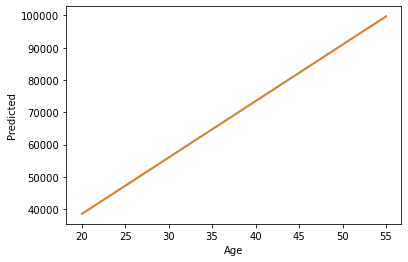

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Age',y='Actual',data=Results)
sns.lineplot(x='Age',y='Predicted',data=Results)
plt.plot()